In [1]:
import xarray as xr
import os
import tensorflow as tf
import jdutil # ./jdutil.py
import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from sklearn.model_selection import train_test_split

print('TensorFlow version:',tf.__version__)

TensorFlow version: 2.10.0


In [2]:
files_list = []

print('logging data files...')
for root, dirs, files in os.walk(".\data"):
    for name in files:
        file = os.path.join(root, name)
        print(file)
        files_list.append(file)
      

    
print()
print('-------')
print()
        
main_dataset_num = 8
small_dataset_num = 0

print('loading main dataset',files_list[main_dataset_num])
data = xr.load_dataset(files_list[main_dataset_num])

data = data.assign_coords(lat=data.lat1, lon=data.lon1)

print('loading small dataset',files_list[small_dataset_num])
data_small = xr.load_dataset(files_list[small_dataset_num])

logging data files...
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_00.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_03.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_06.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_09.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_12.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_15.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_18.nc
.\data\atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_21.nc
.\data\model\collocated_era5_atms_n20_20180614_00.nc
.\data\model\collocated_era5_atms_n20_20180614_03.nc
.\data\model\collocated_era5_atms_n20_20180614_06.nc
.\data\model\collocated_era5_atms_n20_20180614_09.nc
.\data\model\collocated_era5_atms_n20_20180614_12.nc
.\data\model\collocated_era5_atms_n20_20180614_15.nc
.\data\model\collocated_era5_atms_n20_20180614_18.nc
.\data\model\collocated_era5_atms_n20_20180614_21.nc

-------



In [5]:
data

<xarray.Dataset>
Dimensions:               (level: 137, obs_id: 81378, channel: 22)
Coordinates:
  * level                 (level) int64 1 2 3 4 5 6 ... 132 133 134 135 136 137
    jd2                   float64 2.458e+06
  * channel               (channel) int64 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22
    lat2                  (obs_id) float64 89.7 89.7 89.7 ... -6.6 -6.6 -6.6
    lon2                  (obs_id) float64 0.0 0.3 0.6 0.9 ... 26.1 26.7 27.3
    lat                   (obs_id) float64 89.65 89.65 89.65 ... -6.585 -6.59
    lon                   (obs_id) float64 -16.2 -16.18 -16.16 ... 26.6 27.2
Dimensions without coordinates: obs_id
Data variables: (12/150)
    crwc                  (level, obs_id) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    cswc                  (level, obs_id) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    t                     (level, obs_id) float64 176.8 176.8 ... 295.5 295.7
    q                     (level, obs_id) float64 2.496e-06 ... 0.007096
    o3                    (level, obs_id) float64 2.439e-07 ... 4.495e-08
    clwc                  (level, obs_id) float64 -1.164e-10 ... -1.164e-10
    ...                    ...
    scan_line             (obs_id) float64 2.073e+03 2.073e+03 ... 3.213e+03
    scan_line_stddev      (obs_id) float64 623.6 623.7 623.7 ... nan 0.7071 nan
    scan_line_count       (obs_id) float64 4.0 4.0 4.0 4.0 ... 1.0 1.0 2.0 1.0
    fov1                  (obs_id) float64 91.0 91.0 91.0 91.0 ... 3.0 2.0 1.0
    fov1_stddev           (obs_id) float64 4.712e-06 4.749e-06 ... 1.353e-07 nan
    fov1_count            (obs_id) float64 4.0 4.0 4.0 4.0 ... 1.0 1.0 2.0 1.0

In [3]:
def append_dataset(file):
    print('loading dataset',file)
    data_temp = xr.load_dataset(file)
    data_temp = data_temp.assign_coords(lat=data_temp.lat1, lon=data_temp.lon1)
    data_temp = data_temp.where(data_temp.lsm == 1.0, drop=True)
    data_temp = data_temp.where(data_temp.tcc <= 0.1, drop=True)
    variables = [
        'lat1',
        'lon1',
        'zenith_angle',
        'azimuth_angle',
        'skt',
        'u10n',
        'v10n',
        'sp',
        'msl',
        'fsr',
        'u100',
        'v100',
        'cvl',
        'cvh',
        'tvl',
        'tvh',
        'swvl1',
        'swvl2',
        'swvl3',
        'swvl4',
        'slt',
        'lai_lv',
        'lai_hv',
        'sdfor',
        'stl1',
        'stl2',
        'stl3',
        'stl4',
        'd2m'
    ]

    x = data_model[variables].to_array().values.T
    y = data_model.obs.values
    
    if(data_large_x.shape == (1,1)):
        data_large_x = x
    else:
        data_large_x = np.vstack((data_large_x, x))
        
    if(data_large_y.shape == (1,1)):
        data_large_y = y
    else:
        data_large_y = np.vstack((data_large_y, y))
    

In [4]:
# build large dataset for training
data_large_x = np.empty((1,1))
data_large_y = np.empty((1,1))

for root, dirs, files in os.walk(".\data\model"):
    for name in files:
        file = os.path.join(root, name)
        print('loading dataset',file)
        data_temp = xr.load_dataset(file)
        data_temp = data_temp.assign_coords(lat=data_temp.lat1, lon=data_temp.lon1)
        #data_temp = data_temp.where(data_temp.lsm == 1.0, drop=True)
        #data_temp = data_temp.where(data_temp.tcc <= 0.1, drop=True)
        variables = [
            'lat1',
            'lon1',
            'zenith_angle',
            'azimuth_angle',
            'skt',
            'u10n',
            'v10n',
            'sp',
            'msl',
            'fsr',
            'u100',
            'v100',
            'cvl',
            'cvh',
            'tvl',
            'tvh',
            'swvl1',
            'swvl2',
            'swvl3',
            'swvl4',
            'slt',
            'lai_lv',
            'lai_hv',
            'sdfor',
            'stl1',
            'stl2',
            'stl3',
            'stl4',
            'd2m'
        ]

        x = data_temp[variables].to_array().values.T
        y = data_temp.obs.values

        if(data_large_x.shape == (1,1)):
            data_large_x = x
        else:
            data_large_x = np.vstack((data_large_x, x))

        if(data_large_y.shape == (1,1)):
            data_large_y = y
        else:
            data_large_y = np.vstack((data_large_y, y))
            
# normalize input data, mu=0, sigma=1
x = (data_large_x - data_large_x.mean(axis=0)) / data_large_x.std(axis=0)

# Add bias term
#x = np.hstack((x, np.ones((x.shape[0], 1))))

# Omitting adding date for now: all the same date.
#x = np.hstack((x, np.full((x.shape[0], 1), date_num)))

# mean center output data
y = (data_large_y - data_large_y.mean(axis=0))

print('x size',x.shape)
print('y size',y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

loading dataset .\data\model\collocated_era5_atms_n20_20180614_00.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_03.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_06.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_09.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_12.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_15.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_18.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_21.nc
x size (578622, 29)
y size (578622, 22)


In [110]:
tb_data = np.empty((0,22))
for root, dirs, files in os.walk("./data/atms"):
    for name in files:
        file = os.path.join(root, name)
        print('loading dataset',file)
        data_temp = xr.load_dataset(file)
        data_temp = data_temp.tb.squeeze("nScanAng").values.T
        tb_data = np.vstack((tb_data, data_temp))
        
print('tb_data shape', tb_data.shape)

loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_00.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_03.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_06.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_09.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_12.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_15.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_18.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_21.nc
tb_data shape (578622, 22)


In [58]:
x

array([[ 1.73400561,  0.11508019, -0.64610415, ..., -1.89345142,
        -1.87788301, -1.56480839],
       [ 1.73625145,  0.12364439, -0.66430472, ..., -1.90887153,
        -1.88931555, -1.54853369],
       [ 1.73623269,  0.1274038 , -0.67747788, ..., -1.91020279,
        -1.88976287, -1.54853369],
       ...,
       [-2.05327859, -0.43491607, -0.31416286, ...,  0.55662698,
         0.85986334,  1.04892632],
       [-2.05585807, -0.42908029, -0.17268336, ...,  0.55307769,
         0.85426008,  1.08468064],
       [-2.05717762, -0.42608493, -0.10268439, ...,  0.52567619,
         0.84092289,  1.06973793]])

In [4]:
np.unique(data.lon1.values).shape

(77177,)

In [5]:
data_small

<xarray.Dataset>
Dimensions:     (nScanAng: 1, nChanl: 22, nProfs: 81378)
Dimensions without coordinates: nScanAng, nChanl, nProfs
Data variables:
    tb          (nScanAng, nChanl, nProfs) float64 66.49 66.5 ... 253.2 252.5
    emiss       (nChanl, nProfs) float64 0.0001 0.0001 0.0001 ... 0.0001 0.0001
    Frequency   (nChanl) float64 23.8 31.4 50.3 51.76 ... 183.3 183.3 183.3
    Wavenumber  (nChanl) float64 0.7939 1.047 1.678 1.727 ... 6.115 6.115 6.115
    rad         (nScanAng, nChanl, nProfs) float64 0.000344 0.000344 ... 0.07679

In [6]:
# Filter data to strictly land with clear-sky conditions for model training
data_model = data.where(data.lsm == 1.0, drop=True)
data_model = data_model.where(data_model.tcc <= 0.1, drop=True)
data_model


<xarray.Dataset>
Dimensions:               (level: 137, obs_id: 8213, channel: 22)
Coordinates:
  * level                 (level) int64 1 2 3 4 5 6 ... 132 133 134 135 136 137
    jd2                   float64 2.458e+06
  * channel               (channel) int64 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22
    lat2                  (obs_id) float64 80.7 80.7 80.7 ... -5.7 -5.7 -5.7
    lon2                  (obs_id) float64 58.5 58.8 59.1 ... 20.1 20.4 20.7
    lat                   (obs_id) float64 80.66 80.71 80.71 ... -5.652 -5.682
    lon                   (obs_id) float64 58.37 58.96 59.23 ... 20.46 20.67
Dimensions without coordinates: obs_id
Data variables: (12/150)
    crwc                  (level, obs_id) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    cswc                  (level, obs_id) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    t                     (level, obs_id) float64 177.1 177.1 ... 295.6 295.8
    q                     (level, obs_id) float64 2.496e-06 ... 0.01002
    o3                    (level, obs_id) float64 1.981e-07 ... 4.274e-08
    clwc                  (level, obs_id) float64 -1.164e-10 ... -1.164e-10
    ...                    ...
    scan_line             (obs_id) float64 2.119e+03 2.119e+03 ... 3.213e+03
    scan_line_stddev      (obs_id) float64 632.9 596.1 578.4 ... nan nan nan
    scan_line_count       (obs_id) float64 4.0 6.0 8.0 8.0 ... 1.0 1.0 1.0 1.0
    fov1                  (obs_id) float64 69.0 68.74 68.55 ... 23.0 21.0 20.0
    fov1_stddev           (obs_id) float64 3.137e-06 0.4866 0.5334 ... nan nan
    fov1_count            (obs_id) float64 4.0 6.0 8.0 8.0 ... 1.0 1.0 1.0 1.0

(array([  17.,   13.,   92.,  443.,  948., 1410., 1408., 1189., 1903.,
         790.]),
 array([240.83955644, 245.46923566, 250.09891488, 254.7285941 ,
        259.35827332, 263.98795254, 268.61763176, 273.24731098,
        277.87699019, 282.50666941, 287.13634863]),
 <BarContainer object of 10 artists>)

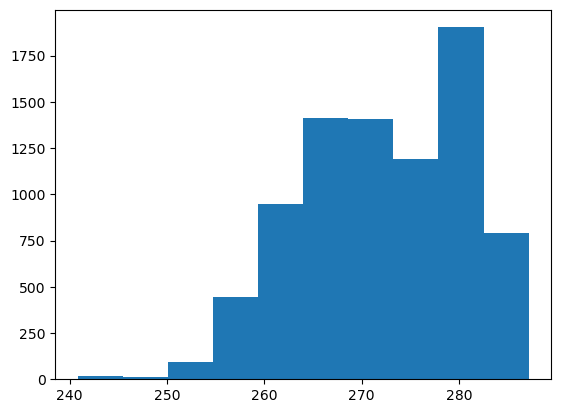

In [7]:
plt.hist(data_model.obs.values[:,3])

In [17]:
date_tuple = jdutil.jd_to_date(float(data_model.coords['jd2'].values))
print(date_tuple)
date_num = datetime.date(date_tuple[0], date_tuple[1], int(date_tuple[2])).timetuple().tm_yday
date_num

(2018, 6, 14.0)


165

In [6]:
variables = [
    'lat1',
    'lon1',
    'zenith_angle',
    'azimuth_angle',
    'skt',
    'u10n',
    'v10n',
    'sp',
    'msl',
    'fsr',
    'u100',
    'v100',
    'cvl',
    'cvh',
    'tvl',
    'tvh',
    'swvl1',
    'swvl2',
    'swvl3',
    'swvl4',
    'slt',
    'lai_lv',
    'lai_hv',
    'sdfor',
    'stl1',
    'stl2',
    'stl3',
    'stl4',
    'd2m'
]

# normalize input data, mu=0, sigma=1
x = data_model[variables].to_array().values.T
x = (x - x.mean(axis=0)) / x.std(axis=0)

# Add bias term
#x = np.hstack((x, np.ones((x.shape[0], 1))))

# Omitting adding date for now: all the same date.
#x = np.hstack((x, np.full((x.shape[0], 1), date_num)))

# mean center output data
y = data_model.obs.values
y = (y - y.mean(axis=0))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)


NameError: name 'data_model' is not defined

In [7]:
tb = data_small.tb.squeeze("nScanAng")
tb

<xarray.DataArray 'tb' (nChanl: 22, nProfs: 81378)>
array([[ 66.49367829,  66.50175139,  66.50821946, ...,  96.49976516,
        108.26119422, 121.94173353],
       [ 44.48270327,  44.48579427,  44.48842938, ...,  51.93460627,
         58.53176994,  65.62221236],
       [192.94275653, 192.9442516 , 192.94553776, ..., 193.95051388,
        204.3565144 , 211.10490442],
       ...,
       [258.10910507, 258.1054457 , 258.10439305, ..., 270.12968752,
        269.77642184, 269.40148056],
       [250.51627992, 250.51296449, 250.51213303, ..., 262.87244158,
        262.43797555, 261.9392333 ],
       [243.00036133, 242.99765045, 242.99697468, ..., 253.793431  ,
        253.20312599, 252.46431185]])
Dimensions without coordinates: nChanl, nProfs

In [10]:
dT = data.obs - tb.T.values
dT.sel(channel=16)

<xarray.DataArray 'obs' (obs_id: 81378)>
array([133.42658718, 133.4131588 , 133.40120569, ..., 143.96170966,
       128.9590228 , 112.1624468 ])
Coordinates:
    jd2      float64 2.458e+06
    channel  int64 16
    lat2     (obs_id) float64 89.7 89.7 89.7 89.7 89.7 ... -6.6 -6.6 -6.6 -6.6
    lon2     (obs_id) float64 0.0 0.3 0.6 0.9 1.2 ... 27.3 25.5 26.1 26.7 27.3
    lat      (obs_id) float64 89.65 89.65 89.65 89.65 ... -6.593 -6.585 -6.59
    lon      (obs_id) float64 -16.2 -16.18 -16.16 -16.14 ... 26.04 26.6 27.2
Dimensions without coordinates: obs_id

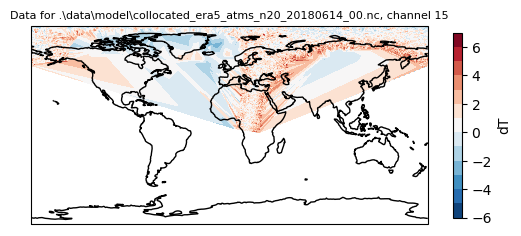

In [8]:
# Plot dT

dT = data.obs - tb.T.values
#dT = data_large_y - tb_data

ngridx = 5000
ngridy = 5000
margin = 0
channel_select = 15

values = dT.sel(channel=channel_select)
#values = dT[:,channel_select + 1]

lats = dT.lat.values
#lats = dT[]
lons = dT.lon.values

# Interpolation
xi = np.linspace(lons.min() - margin, lons.max() + margin, ngridx)
yi = np.linspace(lats.min() - margin, lats.max() + margin, ngridy)
triang = tri.Triangulation(lons, lats)
interpolator = tri.LinearTriInterpolator(triang, values)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.set_title(f"Data for {files_list[main_dataset_num]}, channel {channel_select}",
             fontdict={'fontsize': 8})

cntr = ax.tricontourf(lons, lats, values, levels=14, cmap="RdBu_r")

plt.colorbar(cntr, ax=ax, label="dT", shrink=0.5)

plt.show()

#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()
#ax.coastlines()
#ax.set_title(f"Data for {files_list[main_dataset_num]} filtered by lsm=1.0, tcc <= 0.1, channel {channel_select}",
#             fontdict={'fontsize': 8})

#plt.contourf(xi, yi, zi, 60,
#             transform=ccrs.PlateCarree())

#plt.show()

In [121]:
values.std()

<xarray.DataArray 'obs' ()>
array(1.63715672)
Coordinates:
    jd2      float64 2.458e+06
    channel  int64 22

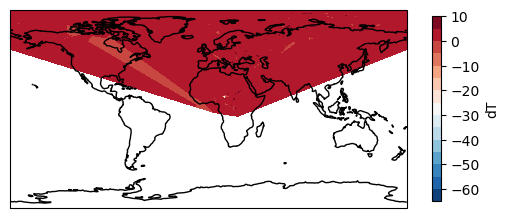

In [123]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

cntr = ax.tricontourf(lons, lats, values, levels=14, cmap="RdBu_r")

plt.colorbar(cntr, ax=ax, label="dT", shrink=0.5)

plt.show()

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(x_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(22)
])

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                              min_delta=0.01,
#                                              patience=3,
#                                              restore_best_weights=True)

loss_fn = tf.keras.losses.MeanSquaredError()

model.compile(optimizer='adam',
              loss=loss_fn)


In [81]:
model.fit(x_train, y_train, 
          epochs=100,
          validation_data=(x_test, y_test))

Epoch 1/100
1540/1540 [==============================] - 7s 4ms/step - loss: 20.7059 - val_loss: 10.9692
Epoch 2/100
1540/1540 [==============================] - 6s 4ms/step - loss: 10.8123 - val_loss: 8.2215
Epoch 3/100
1540/1540 [==============================] - 5s 4ms/step - loss: 9.0276 - val_loss: 7.0057
Epoch 4/100
1540/1540 [==============================] - 5s 4ms/step - loss: 8.0477 - val_loss: 6.3555
Epoch 5/100
1540/1540 [==============================] - 6s 4ms/step - loss: 7.4274 - val_loss: 5.7482
Epoch 6/100
1540/1540 [==============================] - 5s 3ms/step - loss: 6.9950 - val_loss: 5.3837
Epoch 7/100
1540/1540 [==============================] - 5s 4ms/step - loss: 6.7031 - val_loss: 5.3912
Epoch 8/100
1540/1540 [==============================] - 5s 4ms/step - loss: 6.4830 - val_loss: 5.1120
Epoch 9/100
1540/1540 [==============================] - 5s 3ms/step - loss: 6.3037 - val_loss: 4.9956
Epoch 10/100
1540/1540 [==============================] - 6s 4ms/step 

Epoch 80/100
1540/1540 [==============================] - 5s 4ms/step - loss: 4.3381 - val_loss: 2.8106
Epoch 81/100
1540/1540 [==============================] - 5s 3ms/step - loss: 4.3610 - val_loss: 2.6976
Epoch 82/100
1540/1540 [==============================] - 6s 4ms/step - loss: 4.3689 - val_loss: 2.7359
Epoch 83/100
1540/1540 [==============================] - 5s 3ms/step - loss: 4.3378 - val_loss: 2.8265
Epoch 84/100
1540/1540 [==============================] - 5s 4ms/step - loss: 4.3717 - val_loss: 2.7285
Epoch 85/100
1540/1540 [==============================] - 6s 4ms/step - loss: 4.3139 - val_loss: 2.8373
Epoch 86/100
1540/1540 [==============================] - 6s 4ms/step - loss: 4.3678 - val_loss: 2.7309
Epoch 87/100
1540/1540 [==============================] - 6s 4ms/step - loss: 4.3155 - val_loss: 2.7402
Epoch 88/100
1540/1540 [==============================] - 6s 4ms/step - loss: 4.3264 - val_loss: 2.7860
Epoch 89/100
1540/1540 [==============================] - 5s 4ms

In [82]:
y_pred = model.predict(x_train)

loss_fn(y_pred, y_train).numpy()

1540/1540 [==============================] - 3s 2ms/step


2.6300064782339